In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [15]:
data = pd.read_csv('emails.csv')

In [16]:
#drop column Email No from data
data.pop('Email No.')

0          Email 1
1          Email 2
2          Email 3
3          Email 4
4          Email 5
           ...    
5167    Email 5168
5168    Email 5169
5169    Email 5170
5170    Email 5171
5171    Email 5172
Name: Email No., Length: 5172, dtype: object

In [17]:
# Checking Null values
data.isnull().sum()*100/data.shape[0]

the           0.0
to            0.0
ect           0.0
and           0.0
for           0.0
             ... 
military      0.0
allowing      0.0
ff            0.0
dry           0.0
Prediction    0.0
Length: 3001, dtype: float64

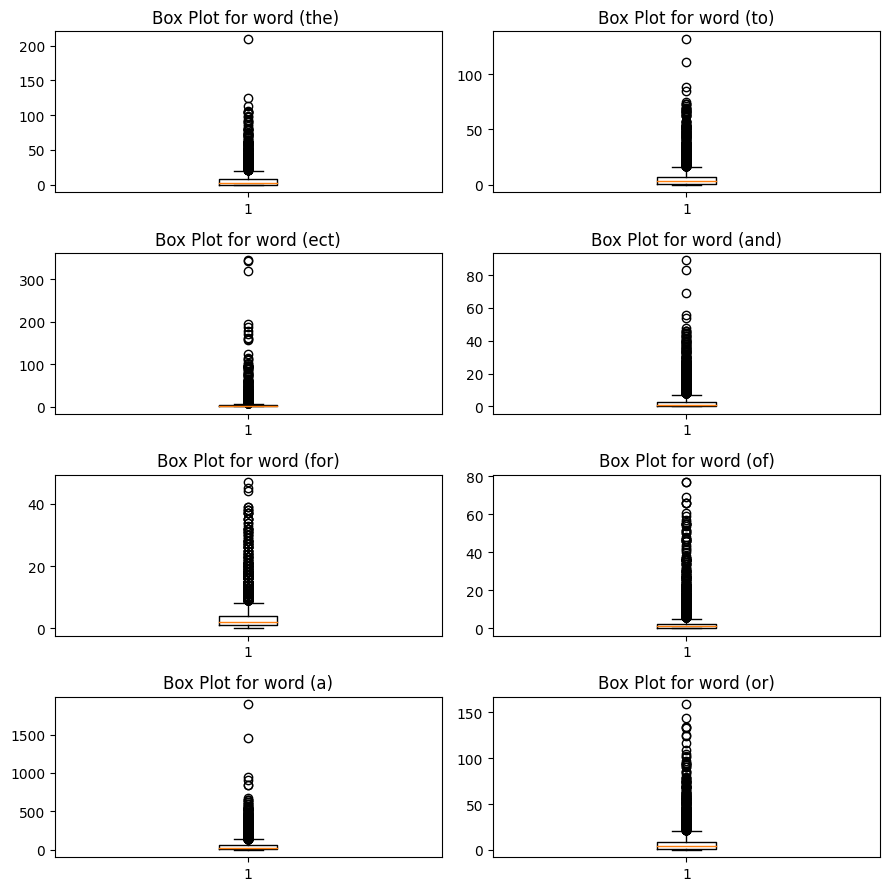

In [18]:
fig = plt.figure(figsize=(9,11))
ax1 = fig.add_subplot(5,2,1)
ax1.boxplot(data['the'])
ax1.set_title('Box Plot for word (the) ')

ax2 = fig.add_subplot(5,2,2)
ax2.boxplot(data['to'])
ax2.set_title('Box Plot for word (to)')

ax3 = fig.add_subplot(5,2,3)
ax3.boxplot(data['ect'])
ax3.set_title('Box Plot for word (ect)')

ax4 = fig.add_subplot(5,2,4)
ax4.boxplot(data['and'])
ax4.set_title('Box Plot for word (and)')

ax5 = fig.add_subplot(5,2,5)
ax5.boxplot(data['for'])
ax5.set_title('Box Plot for word (for)')

ax6 = fig.add_subplot(5,2,6)
ax6.boxplot(data['of'])
ax6.set_title('Box Plot for word (of)')

ax7 = fig.add_subplot(5,2,7)
ax7.boxplot(data['a'])
ax7.set_title('Box Plot for word (a)')

ax8 = fig.add_subplot(5,2,8)
ax8.boxplot(data['or'])
ax8.set_title('Box Plot for word (or)')

plt.tight_layout()
plt.show()

In [19]:
#remove outliers 
#Q1 is the 25% and Q3 is 75% of data, Q2 is 50% of data

Q1 = data.the.quantile(0.25)
Q3 = data.the.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.the >= Q1 - 1.5*IQR) & (data.the <= Q3 + 1.5*IQR)] # drop rows that include outliers

Q1 = data.to.quantile(0.25)
Q3 = data.to.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.to >= Q1 - 1.5*IQR) & (data.to <= Q3 + 1.5*IQR)] 

Q1 = data.ect.quantile(0.25)
Q3 = data.ect.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.ect >= Q1 - 1.5*IQR) & (data.ect <= Q3 + 1.5*IQR)] 

Q1 = data.of.quantile(0.25)
Q3 = data.of.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.of >= Q1 - 1.5*IQR) & (data.of<= Q3 + 1.5*IQR)] 

Q1 = data['and'].quantile(0.25)
Q3 = data['and'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['and']>= Q1 - 1.5*IQR) & (data['and'] <= Q3 + 1.5*IQR)] 

Q1 = data['or'].quantile(0.25)
Q3 = data['or'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['or']>= Q1 - 1.5*IQR) & (data['or'] <= Q3 + 1.5*IQR)] 

Q1 = data['for'].quantile(0.25)
Q3 = data['for'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['for']>= Q1 - 1.5*IQR) & (data['for'] <= Q3 + 1.5*IQR)] 

Q1 = data['a'].quantile(0.25)
Q3 = data['a'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['a']>= Q1 - 1.5*IQR) & (data['a'] <= Q3 + 1.5*IQR)] 

Q1 = data['i'].quantile(0.25)
Q3 = data['i'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['i']>= Q1 - 1.5*IQR) & (data['i'] <= Q3 + 1.5*IQR)] 

Q1 = data['at'].quantile(0.25)
Q3 = data['at'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['at']>= Q1 - 1.5*IQR) & (data['at'] <= Q3 + 1.5*IQR)] 

Q1 = data['s'].quantile(0.25)
Q3 = data['s'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['s']>= Q1 - 1.5*IQR) & (data['s'] <= Q3 + 1.5*IQR)] 

Q1 = data['e'].quantile(0.25)
Q3 = data['e'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['e']>= Q1 - 1.5*IQR) & (data['e'] <= Q3 + 1.5*IQR)] 

Q1 = data['t'].quantile(0.25)
Q3 = data['t'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['t']>= Q1 - 1.5*IQR) & (data['t'] <= Q3 + 1.5*IQR)] 

Q1 = data['l'].quantile(0.25)
Q3 = data['l'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['l']>= Q1 - 1.5*IQR) & (data['l'] <= Q3 + 1.5*IQR)] 

Q1 = data['m'].quantile(0.25)
Q3 = data['m'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['m']>= Q1 - 1.5*IQR) & (data['m'] <= Q3 + 1.5*IQR)] 

Q1 = data['o'].quantile(0.25)
Q3 = data['o'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['o']>= Q1 - 1.5*IQR) & (data['o'] <= Q3 + 1.5*IQR)]

Q1 = data['n'].quantile(0.25)
Q3 = data['n'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['n']>= Q1 - 1.5*IQR) & (data['n'] <= Q3 + 1.5*IQR)] 

Q1 = data['c'].quantile(0.25)
Q3 = data['c'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['c']>= Q1 - 1.5*IQR) & (data['c'] <= Q3 + 1.5*IQR)] 

In [20]:
print(data)

      the  to  ect  and  for  of   a  you  hou  in  ...  connevey  jay  \
0       0   0    1    0    0   0   2    0    0   0  ...         0    0   
2       0   0    1    0    0   0   8    0    0   4  ...         0    0   
7       0   2    2    3    1   2  21    6    0   2  ...         0    0   
8       2   2    3    0    0   1  18    0    0   3  ...         0    0   
14      2   4    6    0    3   1  16    0    3   6  ...         0    0   
...   ...  ..  ...  ...  ...  ..  ..  ...  ...  ..  ...       ...  ...   
5163    0   0    1    0    0   0   1    0    0   0  ...         0    0   
5165    1   0    1    0    3   1  12    1    0   2  ...         0    0   
5166    1   0    1    1    0   0   4    0    0   0  ...         0    0   
5167    2   2    2    3    0   0  32    0    0   5  ...         0    0   
5169    0   0    1    1    0   0  11    0    0   1  ...         0    0   

      valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0          0    0               0 

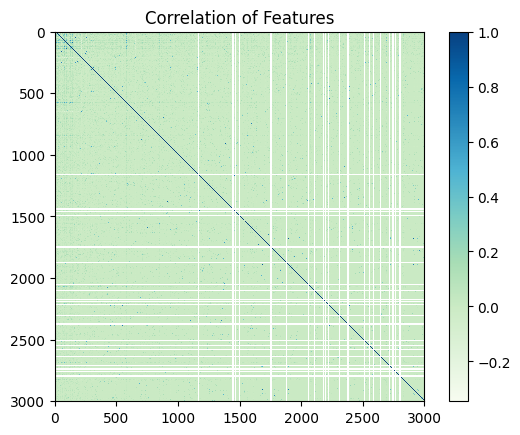

In [21]:
plt.imshow(data.corr(),cmap='GnBu',interpolation='nearest')
plt.colorbar()
plt.title('Correlation of Features')
plt.show()

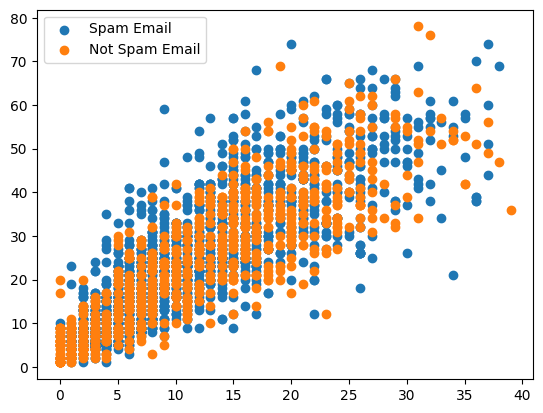

In [22]:
spam = data.query('Prediction==0')
not_spam = data.query('Prediction==1')
plt.scatter(spam['s'],spam['e'],label='Spam Email')
plt.scatter(not_spam['s'],not_spam['e'],label='Not Spam Email')
plt.legend()
plt.show()

In [23]:
y = data.pop('Prediction') 
x = data

In [24]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=100)

In [25]:
#standardize data before builging a model
x_train = preprocessing.scale(x_train)
x_test = preprocessing.scale(x_test)

In [26]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_predicted = model.predict(x_test)
print('Predicted Labels : ',y_predicted)
print('Weights : ',model.coef_)
print('Bias : ',model.intercept_)
acc = model.score(x_test,y_test)
print('Accurecy : ' ,acc)


Predicted Labels :  [1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0
 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0
 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0
 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1
 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 